<a href="https://colab.research.google.com/github/zfukuoka/Copying_a_sutra/blob/master/ISBN978-4-7981-6720-6/list4_10.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Chapter 4 簡単なディープラーニング

* 4.4 演習

### リスト 4.10 データの準備

In [1]:
import numpy as np
from sklearn import datasets
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from keras.utils import np_utils

iris = datasets.load_iris()

scaler = preprocessing.StandardScaler()
scaler.fit(iris.data)

x = scaler.transform(iris.data)
t = np_utils.to_categorical(iris.target)

x_train, x_test, t_train, t_test = train_test_split(x, t, train_size=0.75)

### リスト 4.12 指定した個所にコードを追記

In [2]:
from keras.models import Sequential
from keras.layers import Dense, Activation

model = Sequential()

In [3]:
# --- ここからコードを書く ---
model.add(Dense(16, input_dim=4))
model.add(Activation('relu'))
model.add(Dense(16))
model.add(Activation('relu'))
# --- ここまで ---

In [4]:
model.add(Dense(3))
model.add(Activation('softmax'))
model.compile(optimizer='sgd', loss='categorical_crossentropy', metrics=['accuracy'])


print(model.summary())

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 16)                80        
                                                                 
 activation (Activation)     (None, 16)                0         
                                                                 
 dense_1 (Dense)             (None, 16)                272       
                                                                 
 activation_1 (Activation)   (None, 16)                0         
                                                                 
 dense_2 (Dense)             (None, 3)                 51        
                                                                 
 activation_2 (Activation)   (None, 3)                 0         
                                                                 
Total params: 403
Trainable params: 403
Non-trainable pa

### リスト 4.13 構築したモデルを訓練

In [5]:
history = model.fit(x_train, t_train, epochs=30, batch_size=8)

Epoch 1/30
14/14 [==============================] - 1s 2ms/step - loss: 1.0023 - accuracy: 0.3304
Epoch 2/30
14/14 [==============================] - 0s 3ms/step - loss: 0.9439 - accuracy: 0.4375
Epoch 3/30
14/14 [==============================] - 0s 2ms/step - loss: 0.8945 - accuracy: 0.5446
Epoch 4/30
14/14 [==============================] - 0s 2ms/step - loss: 0.8487 - accuracy: 0.6429
Epoch 5/30
14/14 [==============================] - 0s 2ms/step - loss: 0.8059 - accuracy: 0.6696
Epoch 6/30
14/14 [==============================] - 0s 2ms/step - loss: 0.7641 - accuracy: 0.6964
Epoch 7/30
14/14 [==============================] - 0s 3ms/step - loss: 0.7221 - accuracy: 0.7232
Epoch 8/30
14/14 [==============================] - 0s 2ms/step - loss: 0.6814 - accuracy: 0.7411
Epoch 9/30
14/14 [==============================] - 0s 2ms/step - loss: 0.6392 - accuracy: 0.7857
Epoch 10/30
14/14 [==============================] - 0s 2ms/step - loss: 0.6004 - accuracy: 0.8214
Epoch 11/30
14/14 [

### リスト 4.14 学習の推移

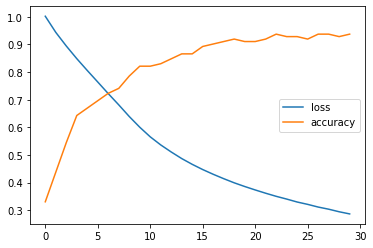

In [6]:
import matplotlib.pyplot as plt

hist_loss = history.history['loss']
hist_acc = history.history['accuracy']

plt.plot(np.arange(len(hist_loss)), hist_loss, label='loss')
plt.plot(np.arange(len(hist_acc)), hist_acc, label='accuracy')
plt.legend()
plt.show()

### リスト 4.15 評価

In [7]:
loss, accuracy = model.evaluate(x_test, t_test)
print(loss, accuracy)

2/2 [==============================] - 0s 9ms/step - loss: 0.2878 - accuracy: 0.9211
0.287848562002182 0.9210526347160339


### リスト 4.16 予測

In [8]:
model.predict(x_test)

array([[0.9588845 , 0.03094592, 0.01016962],
       [0.97918093, 0.01504301, 0.00577605],
       [0.9843448 , 0.01094688, 0.00470827],
       [0.00607051, 0.04063559, 0.9532939 ],
       [0.10953166, 0.637054  , 0.25341427],
       [0.05367358, 0.5379663 , 0.40836003],
       [0.97532153, 0.01822001, 0.00645839],
       [0.04306098, 0.48799172, 0.46894726],
       [0.00414264, 0.0841044 , 0.911753  ],
       [0.02915384, 0.3726234 , 0.5982228 ],
       [0.11250954, 0.70058334, 0.18690719],
       [0.09579603, 0.70374006, 0.20046392],
       [0.92904437, 0.05435343, 0.01660219],
       [0.9661257 , 0.02500399, 0.00887027],
       [0.01165868, 0.17454539, 0.81379586],
       [0.98297447, 0.01269785, 0.00432766],
       [0.07793047, 0.32280138, 0.59926814],
       [0.96519566, 0.02673397, 0.00807035],
       [0.02120716, 0.3651357 , 0.6136571 ],
       [0.00415141, 0.09081598, 0.90503263],
       [0.9656123 , 0.02571828, 0.00866938],
       [0.02367757, 0.3712914 , 0.60503095],
       [0.